# Searching for Potentially Habitable Extrasolar Planets: using Kepler data

Student number: 24511

### Abstract: 
 The possibility of finding another world that hosts living organisms has fueled the hunt for a habitable planet outside our solar system. Exoplanets are planets that orbit stars outside our solar system and these planets can be investiagted using the transit method. This study aims to locate exoplanets from astronomical data sets and investigate the habitability of these exoplanets. Using Kepler data, we removed outliers using the Z method and removed noise using a median filter to produce clean light curves. We then applied Lomb-Scargle periodograms to detect periodic signals, further analysis of these signals resolved the transit periods of four exoplanets. Habitability of these exoplanets was determined from three main areas; the habitability zone, atmospheric composition and planet density. From the four exoplanets, none of them orbited within the habitable zone. Analysis suggested all four exoplanets contained an atmosphere of $O_2$, $N_2$, $CO_2$ and $H_2O$. A theoretical research model suggested two planets at the maximum albedo limit could harbour the conditions of liquid water. Exoplanets B, C and D are ice/gas giants formed by core accretion and are Hot Neptune's, inferring none of these planets are habitable. Exoplanet A is likely terrestrial with an Iron core, although uncertainty makes compositional analysis difficult. Future observations would further investigate atmospheric composition. Although, this study concluded that none of the exoplanets are habitable. We obtained evidence for overestimations and underestimations of habitability. Suggesting further observations are required to confirm habitability.

In [3]:
from mytools import astro_labs
from visuals import plots
from dictionary import planetary_system_results

In [2]:
astro = astro_labs(mykepler = '4')
astro.__doc__

'This is a class, where all the relevent functions can be performed'

In [3]:
plots.__doc__

'This is a class, where all the relevent visualisations can be performed'

In [4]:
astro.get_data()

### 1. Introduction:

Exoplanets, or extrasolar planets, are planets that orbit around stars outside our solar system (excluding rogue planets). Since the first detection of an exoplanet in 1992 (Wolszcan & Frail 1992), more than 4000 exoplanets have been discovered.
<br>
<br>
There are two main techniques for finding exoplanets, the radial velocity method and the transit method. These methods can be divided into gravitational-based methods and light-based methods respectively. The transit method measures the brightness of a star over some time, a dip in the observed brightness reveals the presence of an orbiting exoplanet. This method however relies on the exoplanet orbiting directly in the observer's line of sight and minimal blurring effects from earth's atmosphere. These detection issues led to the introduction of space telescopes, they have a clearer view of the universe and are subject to minimal distortion making them suitable for detecting exoplanets. One of the most noted discovery space telescopes was the Kepler telescope, launched in 2009 to discover Earth-size exoplanets using the transit method.
<br>
Searching for habitable exoplanets helps us further understand how our solar system was formed, increases the probability of finding an Earth-like world, and is a step in answering the thought-provoking question "Are we alone in the universe?". In this study we analysed Kepler data using the transit method to search for exoplanets and determine the habitability of these exoplanets. To determine habitability we looked at 3 areas; habitability zone, planet atmosphere and planet composition.
<br>
The habitable zone is a range of orbits around a star, where it is neither too hot nor too cold for liquid water to exist on the surface of a planet. The semi-major axis is key in determining if exoplanets lie in this zone. The semi-major axis is determined by using Kepler's third law. The habitable zone is derived from Flux equations (see Appendix A): 
<br>
<br>
$$ T \propto r^{-1/2}. \tag{1}$$
<br>
Planet atmosphere is determined by planet mass. If the mass is too low and the gravity is weak the atmosphere will not hold and slip away, however, if the mass is too great gravity will be too strong to support life. On an exoplanet with no atmosphere it is unlikely complex life can survive. The atmosphere is calculated by making assumptions about the exoplanet's bond albedo $A_{b}$ to obtain an equilibrium temperature $T_{eq}$ (see Appendix A). Bond albedo is the ratio of the total radiation reflected by the object to the total incident light from the sun. The equilibrium temperature is a theoretical temperature where a planet acts as a black body using only power from the host star (Lissauer et al 2019):
<br>
<br>
$$ T_{eq} = \left( \frac{(1-A_{b})L_{solar}}{16\sigma\pi a^2} \right)^{1/4}\tag{2}. $$
<br>
The effective temperature is then used to find the root mean squared (rms) speed of molecules on the exoplanet's surface, 
<br>
<br>
$$ v_{rms} = \sqrt{\frac{3kT_{eq}}{m}}.\tag{3} $$
<br>
When compared to the exoplanet's escape velocity,
<br>
<br>
$$ v_{escape} = \sqrt{\frac{2GM}{r}}\tag{4} $$
<br>
one can determine if an atmosphere holds, where $$r$$ represents the radius of the respected exoplanet.
<br>
Planet density provides information on the composition and atmospheres of the exoplanet. To further our analysis we determined how our exoplanets compared to the NASA exoplanet archive and discussed follow up observations.
<br>
The outline of this study is as follows; Section 2 presents the results of modeling the Kepler data to identify transits and exoplanet locations (periods). Section 3 presents the data analysis and figures in determining habitability. Section 4 summarises the investigation into the habitability of extrasolar planets in concise bullet points.

### 2. Results - Modelling of Kepler lightcurve

#### 2.1 Lightcurve
We searched for exoplanets using 4.38 years of data from the Kepler telescope. This dataset observed a star we called Star E. To remove noise we used a median filter with a window size of 121, this filter removed impulse noise. The filter works by taking a median value of all neighbouring pixels, this is well suited to situations in which retention of sharp edges and discontinuities in the data are important (Stone 1995). We then applied a Z score to the smoothed data to detect and remove any outliers more than 3 standard deviations from the mean. The Z score measure how many deviations above or below the mean a data point is. This cleaned data is displayed in figure 1.

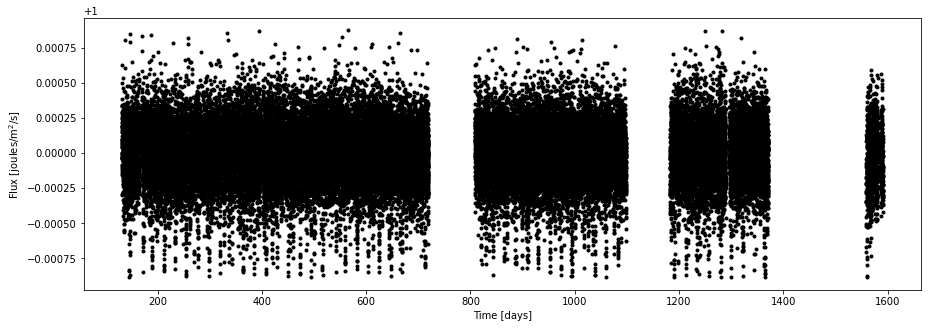

In [5]:
flux, time = astro.filtering(Savitzky_Golay = False)

__Figure 1:__ Normalised lightcurve of cleaned data

#### 2.2 Lomb-Scargle periodogram
The Lomb-Scargle (L-S) periodogram (Lomb 1976; Scargle 1982) is a well-known algorithm for detecting and characterising periodicity in unevenly sampled time-series. We applied the L-S method to the normalised lightcurve in figure 1. The L-S periodogram computed a Fourier-like power spectrum estimator to detect the frequency of periodic signals resulting in figure 2, left panel. We applied a second L-S to filter the signal of the left panel, this helped identify the period locations of these periodic signals. This is depicted in figure 2, right panel, the inset plot details the region we searched for the transit periods (VandarPlas 2018).

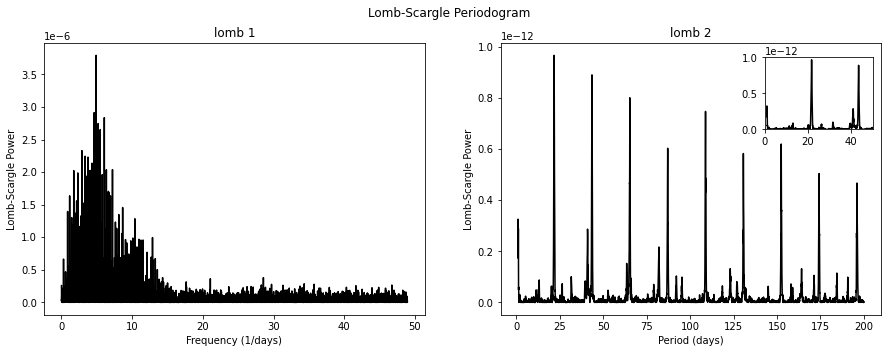

In [6]:
array = astro.periodogram()

__Figure 2:__  Left panel: Lomb–Scargle periodogram computed from the data shown in Figure 1. Right panel: Lomb-Scargle periodogram transformed from the left panel, with an inset detailing the  selected region, 50  days,for peak analysis.

#### 2.3 Transit depth
We identified possible transit periods from figure 2, right panel, by identifying spiked Lomb-Scargle readings and the respective periods. We then folded light curves using these possible periods to obtain a detailed view of individual transits. The folded light curve indicates the flux and phase, a clear transit is represented by an obvious dip in the flux. Precise transit periods were located by iterating around possible periods until a clear dip was located. We then repeated iterations around these peaks until the iterations were no longer resolvable and a clear flux pattern was obtaind. We fitted a function to the identified transit periods depicted in figure 3 by concatenating a function to create corrected values and covarience; the function finds the optimal set of parameters to fit the dataset.

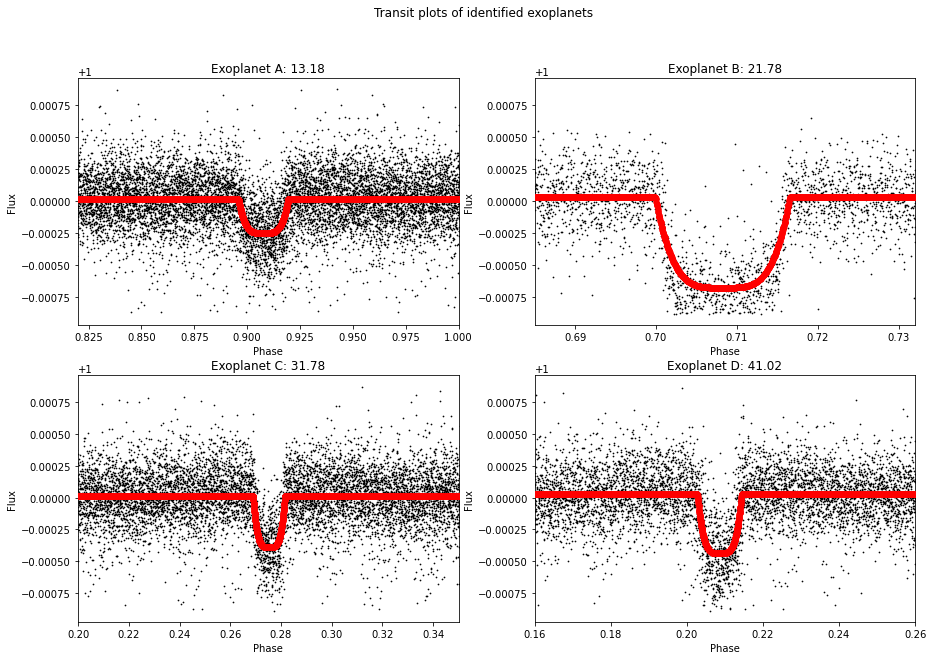

In [7]:
astro.transit_plots()

__Figure 3:__ Folded transit at determined periods with fitted transit function for exoplanets.

#### 2.4 Exoplanet values
__2.4.1 Habitable zone__
<br>
From the exoplanet periods and provided masses lots of planet properties were calculated. The semi-major axis of the exoplanets was calculated using Keplers third law (see Appendix B). We determined the habitability zone using equation 2. The habitable zone between temperatures 373 K and 273 K corresponds to 0.796 AU and 1.49 AU respectively.
<br>
__2.4.2 Atmosphere__
<br>
An upper and lower limit of bond albedo was estimated from our solar system, under the assumption our exoplanets bond albedo lies within that of our solar system. Maximum value Venus (2) and minimum value Mars (2) is 0.75 and 0.16 respectively. The calculated rms velocity and escape velocity (2, 3) is listed in table 1.
<br>
__2.4.3 Composition__
<br>
The calculated densities are listed in table 3, with remaining exoplanet properties.

__Table 1:__ Calculated and estimated escape velocity and rms velocity values for atmospheric molecules.

|Exoplanet| equilibrium temperature $T_{eq}$ (K)| Escape velocity $v_{esc}$ (km/s) | $O_2$ $v_{rms}$ (km/s) | $N_2$ $v_{rms}$ (km/s) | $CO_2$ $v_{rms}$ (km/s) |$H_2O$ $v_{rms}$ (km/s) |
| :---: | --- |--- | --- | --- |--- |--- |
| A | ${494.7 \atop 677.5}$ |4.052 ${+4.68 \atop -2.34}$ | ${0.622 \atop 0.728}$ | ${0.660 \atop 0.773}$ |${0.530 \atop 0.620}$ |${0.826 \atop 0.967}$ |
| B | ${418.4 \atop 573.0}$ |10.312 ${+1.95 \atop -2.93}$ | ${0.572 \atop 0.669}$ | ${0.607 \atop 0.711}$ |${0.487 \atop 0.570}$ |${0.760 \atop 0.889}$ |
| C | ${368.8 \atop 505.2}$| 13.757 ${+1.43 \atop -1.45}$ |  ${0.537 \atop 0.628}$ | ${0.570 \atop 0.667}$ |${0.457 \atop 0.535}$ |${0.714 \atop 0.835}$ |
| D | ${338.7 \atop 464.0}$ | 17.557 ${+1.49 \atop -1.73}$ | ${0.515 \atop 0.602}$ | ${0.546 \atop 0.639}$ |${0.438 \atop 0.513}$ |${0.684 \atop 0.800}$ |

__Notes.__ The $T_{eq}$ and $v_{rms}$ value is formatted as maximum albedo on top and minimum albedo on bottom.  $O_2$, $N_2$, $CO_2$ and $H_2O$ represent oxygen, nitrogen, carbon dioxide and water respectively.

#### 2.5 Uncertainties
Uncertainties of exoplanet properties are detailed in table 3 and appendix B. Standard error in period determined using residual plot of transit periods. The residual plot was determined by identifying exoplanet period locations on the extended light curve (fig.1) and re-applying the curve fit function at theses periods to give local minimums. The corresponding time values provided the expected values, the difference in period between the expected values and predicted values gives the residual error. Applied covariance function to find flux error.

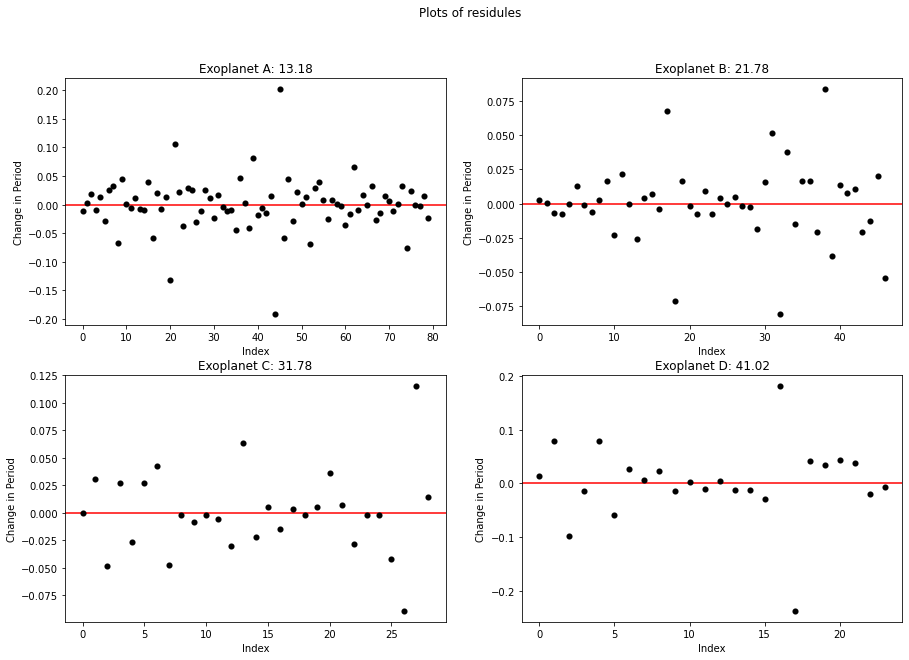

In [8]:
astro.regression_plots()

__Figure 4:__ Residule plots of exoplanets 

|Radius (solar radii)| Mass (solar mass) | Temperature (K) | Luminosity (solar luminosity) | Spectral Type | 
| --- | --- | --- | --- |---| 
| 1.66 $\pm$ 0.07 | 1.1 $\pm$ 0.1 | 5904 $\pm$ 78 | 0.507 | G1 | 

__Table 2__: Star E properties

| Exoplanet| Period (Days) | Flux depth (joules/m$^2$/s) | Mass (Earth Mass) | Radius (Earth Radii) | Semi-Major Axis (A.U.) | Density (Kg/m$^3$)|
| :---: | --- | --- | --- | --- | --- | --- | 
|A  | 13.175 $\pm$ 0.000115| 0.269 $\pm$ 0.0078 |0.390 ${+ 1.42\atop - 0.32}$| 2.972 $\pm$ 0.132 | 0.113 $\pm$ 0.00342 | 81.885 ${+ 298.34\atop - 68.06}$|
|B  | 21.776 $\pm$ 0.000158| 0.708 $\pm$ 0.0112 | 4.1 ${+ 1.7\atop - 2.0}$| 4.825 $\pm$ 0.207 | 0.158 $\pm$ 0.00479| 201.29 ${+ 87.39 \atop - 101.55 }$| 
|C  | 31.784 $\pm$ 0.000441| 0.402 $\pm$ 0.0107 | 5.5 ${+ 1.2\atop - 1.1}$| 3.636 $\pm$ 0.161 | 0.204 $\pm$ 0.00618| 630.81 ${+ 161.13 \atop - 151.45 }$| 
|D  | 41.023 $\pm$ 0.001144| 0.462 $\pm$ 0.0109 | 9.6 ${+ 1.7\atop - 1.8}$| 3.897 $\pm$ 0.171 | 0.241 $\pm$ 0.00730 | 894.37 ${+ 197.34\atop - 204.90 }$| 

__Table 3__: Exoplanet properties

### 3. Discussion

#### 3.1 Habitability zone
The habitable zone is between temperatures 373 K and 273 K corresponding to 0.796 AU and 1.49 AU respectively, as depicted in figure 5. Further calculations showed the exoplanets orbit in a temperature range of 989 K and 677 K. This temperature range is too large to support liquid water on the planet's surface. Despite the fact this information suggests our exoplanets are not within the habitable zone it is important to note that several assumptions were overlooked by the effective temperature calculation (2). Firstly the albedo is ignored, a larger albedo reflects more light and results in a colder planet. For instance, Venus could orbit our sun at a distance of only 0.59 AU to result in a surface temperature of 288 K like on Earth (Williams 2017). Another issue is the atmosphere. The atmosphere also reduces the range of temperatures a planet can experience. A planet with little atmosphere is incapable of buffering temperatures, which results in a planet having both 'habitable' and 'non-habitable' zones at the same time. The moon for instance can reach day-time temperatures of 397 K and night-time temperatures as low as 95 K (Williams 2017). However, planets A, B, C and D are close to star E, therefore would need to cool down to become habitable. Williams information suggests there could be a variation in the calculated temperature of our exoplanets. To further Williams (2017) points about temperature change, on a larger time scale a planet's habitability zone can change as a result of stellar evolution. When a star progresses through its lifetime and runs out of hydrogen the luminosity and subsequent flux of a star decreases. This has an impact on the habitable zone, investing the effects of stellar evolution on the habitable zone could be an area of further investigation. Although, considering this is a main sequence star, the timescale for this is roughly 10$^6$ years.

Figure 5:Visual plot of the habitable zone relative to host star and exoplanets.


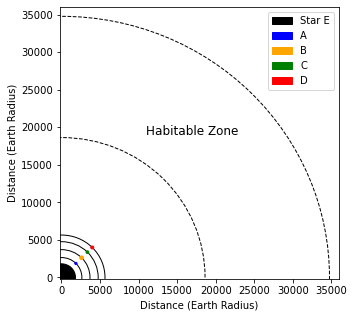

In [9]:
visuals.plot_system()

__Notes.__ the exoplanets and host star have been upscaled by a magnitude of 50 and 10 respectively, to aid visual comparison.

#### 3.2 Atmosphere
Table 1 confirms that the rms speed of $O_2$, $N_2$, $CO_2$ and $H_2O$ is less than the escape velocity on all our exoplanets. Despite the fact bond albedo was estimated as a limit, atmospheric conditions were met for all our exoplanets. Molecules $N_2$ and $CO_2$ heat up the exoplanets as these molecules are green house gases; an example of this is Earth. Earth has a radiative equilibrium temperature of 255 K, this temperature is increased by a factor of 1.13 as a result of greenhouse gases (Hellmann 2018). This suggests the habitable zone is an underestimate. Water is a common ecological requirement for Earth life, Mckay (2014) proposes life can grow and reproduce at temperatures as low as −15 °C, and as high as 122 °C. The effective temperatures (maximum albedo) of exoplanet C and D (<395K) satisfy Mckays conditions, these planets also suggest the presence of liquid water (<373K). The greatest source of uncertainty is the bond albedo estimation, in future a precise value of bond albedo will determine accurate effective temperatures and rms speeds. The bond albedo should be investigated further.

#### 3.3 Density
The density of the exoplanets is used to determine composition. Odrzywoleka and Rafelskia (2018) proposed planets B, C and D are ice giants or gas giants. Exoplanets B, C and D are likely contain large amounts of hydrogen and helium, as a result it is unlikely these are habitable. Figure 6 (left panel) supports this statement suggesting planets B, C and D have hydrogen and helium spheres. Figure 6 shows exoplanet A has an iron core, suggesting exoplanet A is terrestrial. However exoplanet A has the largest uncertainty (+364%) making it difficult to determine A's composition. 

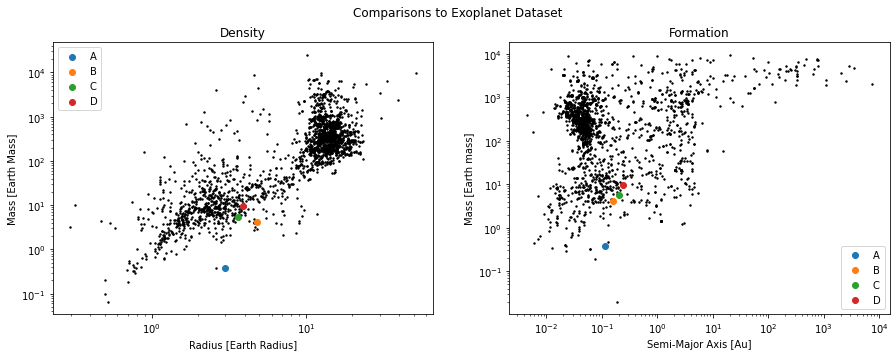

In [6]:
plots.plot_comparisons()

__Figure 6:__ Left panel: Scatter plot (log scale) to compare exoplanet density to population. The dotted green line represents solid iron $Fe$, the dotted yellow line and solid yellow line represent $H/He$ and $H$ respectively. Right panel: Scatter plot (log scale) to compare mass and semi-major axis. The green, red and grey zone represent gravitational instability regime, hot Jupiters and core accretion regime respectively (Seager et al 2017).

#### 3.4 Further comparisons
Further comparisons of our exoplanets help suggest theories of the formation process. Figure 6 (right panel) depicts an exoplanet population which suggests planets B, C and D are formed through core accretion. Core accretion forms rocky planets that accrete a gaseous envelope on close orbits. Exoplanets B, C and D are Neptunian exoplanets as they posses a mass about 4 times or larger than that of Earth. These exoplanets also orbit with 1 AU of star E suggesting these are Hot Neptune exoplanets. Exoplanet A's mass uncertainty is too large to determine the formation technique.

#### 3.5 Follow-up observations
Follow-up observations would remain focused on investigating the habitability of extrasolar planets, specifically atmospheric compositions. To measure the chemical composition of an atmosphere one would use transit spectroscopy. When an exoplanet orbits around a star from the observer's point of view, a small amount of light is absorbed by molecules in the exoplanet's atmosphere. By measuring flux at different wavelengths, the atmospheric composition can be calculated. Understanding an exoplanet's atmospheric composition can help determine changes in temperature due to greenhouse gases and provide updated estimations of the habitable zone. Furthermore, we can identify atmospheres that can support nitrogen fixation and can determine the presence of oxygen, which would be a good indicator of photosynthesis and possibly complex life (Mckay 2014). Wit and Seager (2013) propose a method for constraining the mass of transiting exoplanets predominantly based on radial velocity measurements. With the use of the James Webb Space Telescope (JWST), set to launch on the 22nd, the pool of planets available to this technique extends to super-Earths and Earth-sized planets. This will provide an improved analysis of exoplanet characteristics and reduce uncertainty from previous calculations. For instance, the JWST would help determine an accurate mass for planet A, where the error has inhibited analysis.

### 4. Summary
$\bullet$ In this paper we used Kepler data to identify and determine the habitability of exoplanets orbiting star E. We cleaned Kepler data of Nans, removed outliers using the Z method and removed noise using the median filter to create a clean light curve. We then applied two L-S periodograms to the light curve to detect periodic signals. Closer inspection of these points resolved four clear transit periods and four subsequent exoplanets A, B, C and D.
<br>
$\bullet$ With the exoplanet period and mass we calculated the habitable zone, planet atmosphere and planet density. We also calculated uncertainty using propagated error, residual plots and a covariance function.
<br>
$\bullet$ Analysis showed the exoplanets do not lie in the habitable zone. The planet's semi-major axis is too close to Star E to support liquid water on the planet's surface. The albedo was ignored in calculations suggesting the planet could withstand hotter temperatures if the albedo was high. The buffering effects of the atmosphere was also ignored suggesting the habitable zone is not accurate.
<br>
$\bullet$ Analysis determined the molecules $O_2$, $N_2$, $CO_2$ and $H_2O$ could be present on all exoplanets in the bond albedo limit. The bond albedo was the largest source of uncertainty.
<br>
$\bullet$ Analysis suggested exoplanets B, C and D are ice/gas giants. Too large an error in exoplanet A to calculate composition.
<br>
$\bullet$ Further calculations suggested exoplanets B, C and D were formed by core accretion and are Hot Neptune's, whereas A is potentially a terrestrial planet.
<br>
$\bullet$ Follow-up observations would continue looking at habitability using the JWST to perform transit spectroscopy, focusing on atmospheric composition to determine molecules present, revised calculations of the habitable zone and accurate mass measurements.

### References:

- Wolszcan & Frail, 1992, Nature, 355, 145
- Lissauer, Jonathan & De Pater, 2016, Cambridge University Press, 90
- Stone, 1995, Canadian Journal of Chemistry, 73, 1580
- Lomb, 1976, Astrophysics and Space Science, 39, 447
- Scargle, 1982, Astrophysical journal , 263, 835
- VandarPlas, 2018, Astrophysical journal, 236, 16
- Hellmann, 2018, International Astronautical Congress
- Williams, 2017, Icarus, 283, 300
- Mckay, 2014, PNAS, 111, 35
- Odrzywoleka & Rafelskia, 2018, ACTA PHYSICA POLONICA, 49, 11
- Seager, Kuchner, Hier-Majumder & Militzer, 2017, Astrophysical journal, 669, 1284
- Wit & Seager, 2013, AAAS, 342, 1473
- Nasa exoplanet Archive, 10.26133/NEA12

### Appendix A

#### A.1 Derivation of habitability zone equation
The total flux F is energy per area per time passing through a region and is related to the effective temperature T by the Stefan-Boltzmann constant $ \sigma_{SB} $. Given luminosity L is energy per time:
<br>
<br>
$$ F = \frac{L}{4\pi r^2} = \sigma_{SB}T^4. \tag{5}$$
<br>
This rearranges to give:
<br>
<br>
$$ T =  \left(\frac{L}{4\pi\sigma_{SB}}\right)^{1/4}r^{-1/2}\tag{6}$$
<br>
When considering the flux of one star $\sigma_{SB}$, 4$\pi$ and L are all constant, which gives:
<br>
<br>
$$ T \propto r^{-1/2}. \tag{7}$$
<br>
#### A.2 Derivation of effective temperature

This temperature is reffered to as the equilibrium temperature[2]. Assuming a planet's internal heat can be neglected, an equilibrium temperature, $T_{eq}$, is achieved from a balance of incoming and outgoing radiation[1]:

Provided the incoming solar radiation, $F_{in}$ (absorbed), is balanced, on average, by re-radiation outwards, $F_{out}$ (emitted), one can calculate the tempreture of the object. 
<br>
<br>
$$ F_{in} = F_{out}, \tag{8}$$
<br>
<br>
$$ (1-A_{ab})F_{solar} = F_{out}, \tag{9}$$
<br>
<br>
$$ (1 - A_{b})\left(\frac{L_{solar}}{4\pi a^2}\right) = \sigma T_{eq}^4 . \tag{10}$$
<br>
<br>
Rearranging the above equation gives:
<br>
$$ T_{eq} = \left( \frac{(1-A_{b})L_{solar}}{16\sigma\pi a^2} \right)^{1/4}\tag{11}. $$
### Appendix B

#### B.1 Propagated error of exoplanet radius
From Keplers law:
<br>
<br>
$$\frac{\Delta{F}}{F} = \frac{R_p^2}{R_s^2}\tag{12}$$
<br>
This rearranges to give:
<br>
<br>
$$ R_p = \sqrt{\frac{\Delta{F}}{F}}R_s\tag{13}$$
<br>
The propagated error in planet radius:
<br>
<br>
$$ \frac{\delta{R_p}}{R_p} = \left[\left(\frac{1}{2}\frac{\delta{(\Delta{F})}}{\Delta{F}}\right)^2 + \left(\frac{\delta{R_s}}{R_s}\right)^ 2 + \left(\frac{\delta{F}}{F}\right)^ 2\right]^{1/2} \tag{14}$$
<br>
#### B.2 Propagated error of semi-major axis
From Keplers third law:
<br>
<br>
$$a \approx (GM_*\frac{P^2}{4\pi^2})^{1/3} \tag{15}$$
<br>
The propagated error in semi-major axis:
<br>
<br>
$$ \frac{\delta{a}}{a} = \left[\left(\frac{1}{3}\frac{\delta{M_*}}{{M_*}}\right)^2 + \left(\frac{2}{3}\frac{\delta{P}}{P}\right)^ 2\right]^{1/2} \tag{16}$$
<br>
#### B.3 Propagated error of density
Density:
<br>
<br>
$$ \rho_p = \frac{M_p}{V_p} = \frac{M_p}{\frac{4}{3}\pi R_p^3} \tag{17}$$
<br>
The propagated error in density:
<br>
<br>
$$ \frac{\delta{\rho}}{\rho} = \left[\left(\frac{\delta{M_p}}{M_p}\right)^2 + \left(-3\frac{\delta{R_p}}{R_p}\right)^ 2\right]^{1/2} \tag{18}$$
<br>
#### B.4 Standard error of period
Applied standard error calculation to residual plots in figure 4. Variance:
<br>
<br>
$$ s_{\hat{\beta}} = \sqrt{\frac{\sum{(Y_i - \hat{Y})^2}}{n-2}} \tag{19}$$
<br>
Standard error:
<br>
<br>
$$ SE_{\hat{\beta}} = \frac{s}{\sqrt{SS_{xx}}} = \frac{\sqrt{\frac{\sum{(Y_i - \hat{Y})^2}}{n-2}}}{\sqrt{SS_{xx}}} \tag{20}$$
<br>